In [5]:
# 파이썬에서의 날짜와 시간
# datetime, dateutil
from datetime import datetime
print(datetime(year=2015, month=7, day=4), "\n")

from dateutil import parser
date = parser.parse("4th of July, 2015")
print(date, "\n")

print(date.strftime("%A"), "\n")

2015-07-04 00:00:00 

2015-07-04 00:00:00 

Saturday 



In [7]:
# 타입이 지정된 시간배열: Numpy의 datetime64
import numpy as np
date = np.array("2015-07-04", dtype=np.datetime64)
date

array('2015-07-04', dtype='datetime64[D]')

In [8]:
# 벡터화된 연산
date + np.arange(12)

array(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
       '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
       '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
      dtype='datetime64[D]')

In [14]:
print(np.datetime64("2015-07-04"))
print(np.datetime64("2015-07-04 12:00"))
print(np.datetime64("2015-07-04 12:59:59.50", "ns")) # 시간의 단위 nano-s

2015-07-04
2015-07-04T12:00
2015-07-04T12:59:59.500000000


In [23]:
# Pandas에서의 날짜와 시간: 두 세계의 최선
# Timestamp Object -> DatetimeIndex
import pandas as pd
date = pd.to_datetime("4th of July, 2015")
print(type(date), date, "\n")

print(date.strftime("%A"), "\n")

print(date + pd.to_timedelta(np.arange(12), "D"), "\n")

<class 'pandas._libs.tslibs.timestamps.Timestamp'> 2015-07-04 00:00:00 

Saturday 

DatetimeIndex(['2015-07-04', '2015-07-05', '2015-07-06', '2015-07-07',
               '2015-07-08', '2015-07-09', '2015-07-10', '2015-07-11',
               '2015-07-12', '2015-07-13', '2015-07-14', '2015-07-15'],
              dtype='datetime64[ns]', freq=None) 



In [28]:
# Pandas 시게열: 시간으로 인덱싱하기
index = pd.DatetimeIndex(["2014-07-04", "2014-08-04",
                          "2015-07-04", "2015-08-04",])
data = pd.Series([0, 1, 2, 3], index=index)
print(data, "\n")

# index slicing
print(data["2014-07-04":"2015-07-04"], "\n")

# select year
print(data["2015"], "\n")

2014-07-04    0
2014-08-04    1
2015-07-04    2
2015-08-04    3
dtype: int64 

2014-07-04    0
2014-08-04    1
2015-07-04    2
dtype: int64 

2015-07-04    2
2015-08-04    3
dtype: int64 



In [29]:
# Pandas 시계열 데이터 구조

# TimeStamp, DatetimeIndex
# Period, PeriodIndex
# Timedelta, TimedeltaIndex

dates = pd.to_datetime([datetime(2015, 7, 3), "4th of July, 2015",
                        "2015-Jul-6", "07-07-2015", "20150708"])
dates

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
               '2015-07-08'],
              dtype='datetime64[ns]', freq=None)

In [31]:
# to_period(), PeriodIndex 전환
dates.to_period("D")

PeriodIndex(['2015-07-03', '2015-07-04', '2015-07-06', '2015-07-07',
             '2015-07-08'],
            dtype='period[D]')

In [32]:
# 어떤 날짜에서 다른 날짜를 빼기 -> TimedeltaIndex 생성
dates - dates[0]

TimedeltaIndex(['0 days', '1 days', '3 days', '4 days', '5 days'], dtype='timedelta64[ns]', freq=None)

In [37]:
# 정규 시퀀스: pd.date_range()

# generate sequence with start, end (default: 1-day interval)
print(pd.date_range("2015-07-03", "2015-07-10"), "\n")
print(pd.date_range("2015-07-03", periods=8), "\n")

# change the frequency (freq=)
print(pd.date_range("2015-07-03", periods=8, freq="1H"), "\n")

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D') 

DatetimeIndex(['2015-07-03', '2015-07-04', '2015-07-05', '2015-07-06',
               '2015-07-07', '2015-07-08', '2015-07-09', '2015-07-10'],
              dtype='datetime64[ns]', freq='D') 

DatetimeIndex(['2015-07-03 00:00:00', '2015-07-03 01:00:00',
               '2015-07-03 02:00:00', '2015-07-03 03:00:00',
               '2015-07-03 04:00:00', '2015-07-03 05:00:00',
               '2015-07-03 06:00:00', '2015-07-03 07:00:00'],
              dtype='datetime64[ns]', freq='H') 



In [39]:
# pd.period_range(), pd.timedelta_range()
print(pd.period_range("2015-07", periods=8, freq="M"), "\n")

print(pd.timedelta_range(0, periods=10, freq="H"), "\n")

PeriodIndex(['2015-07', '2015-08', '2015-09', '2015-10', '2015-11', '2015-12',
             '2016-01', '2016-02'],
            dtype='period[M]') 

TimedeltaIndex(['0 days 00:00:00', '0 days 01:00:00', '0 days 02:00:00',
                '0 days 03:00:00', '0 days 04:00:00', '0 days 05:00:00',
                '0 days 06:00:00', '0 days 07:00:00', '0 days 08:00:00',
                '0 days 09:00:00'],
               dtype='timedelta64[ns]', freq='H') 



In [44]:
# 주기와 오프셋
pd.timedelta_range(0, periods=9, freq="2H30T") # freq = 2h30m

TimedeltaIndex(['0 days 00:00:00', '0 days 02:30:00', '0 days 05:00:00',
                '0 days 07:30:00', '0 days 10:00:00', '0 days 12:30:00',
                '0 days 15:00:00', '0 days 17:30:00', '0 days 20:00:00'],
               dtype='timedelta64[ns]', freq='150T')

                High       Low      Open     Close       Volume  Adj Close
Date                                                                      
2004-08-19  2.591785  2.390042  2.490664  2.499133  897427216.0   2.499133
2004-08-20  2.716817  2.503118  2.515820  2.697639  458857488.0   2.697639
2004-08-23  2.826406  2.716070  2.758411  2.724787  366857939.0   2.724787
2004-08-24  2.779581  2.579581  2.770615  2.611960  306396159.0   2.611960
2004-08-25  2.689918  2.587302  2.614201  2.640104  184645512.0   2.640104 



<AxesSubplot:xlabel='Date'>

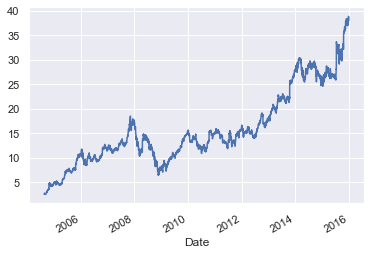

In [57]:
# 리샘플링, 시프팅, 윈도잉
from pandas_datareader import data

goog = data.DataReader("GOOG", start="2004", end="2016",
                       data_source="yahoo")
print(goog.head(), "\n")

# 종가만 사용
goog = goog["Close"]

# 플로팅
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

goog.plot()

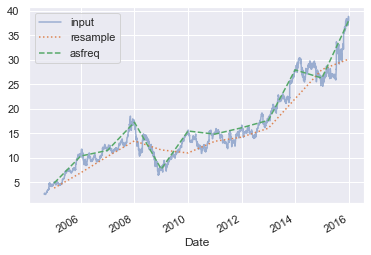

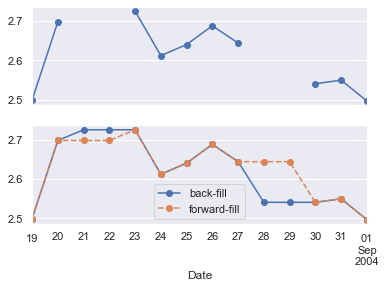

In [72]:
# 리샘플링 및 주기변경 (resample(), asfreq())

# 다운 샘플링
goog.plot(alpha=0.5, style='-')
goog.resample("BA").mean().plot(style=":")
goog.asfreq("BA").plot(style="--");
plt.legend(["input", "resample", "asfreq"],
           loc="upper left");

# 업 샘플링
fig, ax = plt.subplots(2, sharex=True)
data = goog.iloc[:10]

data.asfreq("D").plot(ax=ax[0], marker="o")

data.asfreq("D", method="bfill").plot(ax=ax[1], style="-o")
data.asfreq("D", method="ffill").plot(ax=ax[1], style="--o")
ax[1].legend(["back-fill", "forward-fill"]);

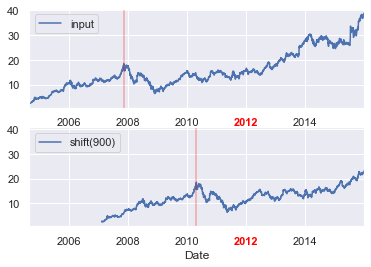

In [86]:
# 시간 이동 (Time-shift)
# shift()

fig, ax = plt.subplots(2, sharey=True)

# 데이터에 주기를 적용
goog = goog.asfreq("D", method="pad")

goog.plot(ax=ax[0])
goog.shift(900).plot(ax=ax[1]) # data if shift by 900 days

# 범례와 주석
local_max = pd.to_datetime("2007-11-05")
offset = pd.Timedelta(900, "D")

ax[0].legend(["input"], loc=2)
ax[0].get_xticklabels()[4].set(weight="heavy", color="red")
ax[0].axvline(local_max, alpha=0.3, color="red")

ax[1].legend(["shift(900)"], loc=2)
ax[1].get_xticklabels()[4].set(weight="heavy", color="red")
ax[1].axvline(local_max + offset, alpha=0.3, color="red")

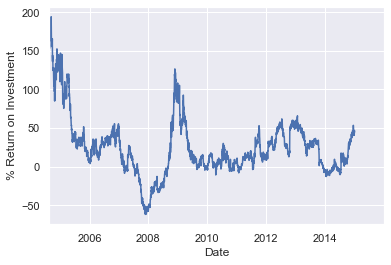

In [88]:
ROI = 100 * (goog.shift(-365) / goog - 1)
ROI.plot()
plt.ylabel("% Return on Investment");

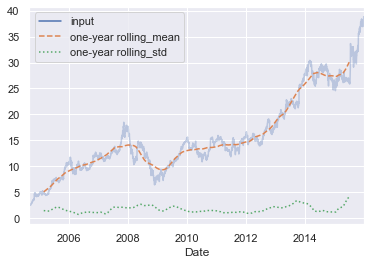

In [89]:
# 롤링 윈도우 (rolling windows)
# rolling()

rolling = goog.rolling(365, center=True)

data = pd.DataFrame({"input": goog,
                     "one-year rolling_mean": rolling.mean(),
                     "one-year rolling_std": rolling.std()})
ax = data.plot(style=["-", "--", ":"])
ax.lines[0].set_alpha(0.3)